In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData
using FreqTables

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/challenge2018.jld2")
@load db dat
pnames(dat)

(:X, :Y)

In [3]:
X = dat.X
Y = dat.Y
ntot, p = size(X)

(4075, 680)

In [4]:
@head X

... (4075, 680)
 


Row,1120,1122,1124,1126,1128,1130,1132,1134,1136,1138,1140,1142,1144,1146,1148,1150,1152,1154,1156,1158,1160,1162,1164,1166,1168,1170,1172,1174,1176,1178,1180,1182,1184,1186,1188,1190,1192,1194,1196,1198,1200,1202,1204,1206,1208,1210,1212,1214,1216,1218,1220,1222,1224,1226,1228,1230,1232,1234,1236,1238,1240,1242,1244,1246,1248,1250,1252,1254,1256,1258,1260,1262,1264,1266,1268,1270,1272,1274,1276,1278,1280,1282,1284,1286,1288,1290,1292,1294,1296,1298,1300,1302,1304,1306,1308,1310,1312,1314,1316,1318,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.597482,0.595978,0.593623,0.59084,0.587451,0.583092,0.578666,0.572134,0.566125,0.560204,0.551694,0.544339,0.537008,0.528312,0.520828,0.51228,0.504673,0.498204,0.48968,0.483176,0.477588,0.470384,0.464844,0.459269,0.454023,0.4496,0.444271,0.440026,0.436514,0.431822,0.428201,0.424881,0.421379,0.41859,0.415556,0.413193,0.411501,0.40946,0.408254,0.407503,0.406948,0.406903,0.407211,0.407941,0.408835,0.410495,0.412211,0.41412,0.416691,0.419178,0.421902,0.424632,0.427036,0.43022,0.432809,0.434996,0.437823,0.439963,0.442041,0.443982,0.445578,0.447395,0.448785,0.449829,0.451165,0.452131,0.453035,0.453898,0.454573,0.455325,0.455932,0.456439,0.45706,0.457588,0.458121,0.458712,0.459253,0.459968,0.460628,0.461245,0.462104,0.462849,0.463604,0.464367,0.464976,0.465614,0.466088,0.466315,0.466568,0.466553,0.466394,0.465981,0.465464,0.464522,0.463511,0.462348,0.460648,0.458807,0.456757,0.454314,⋯
2,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.94057,0.937514,0.934336,0.931181,0.92803,0.924979,0.922076,0.919204,0.916252,0.913228,0.91006,0.906591,0.902934,0.899069,0.894974,0.890786,0.886513,0.882297,0.878178,0.874064,0.870132,0.866404,0.862724,0.859357,0.856211,0.853359,0.850962,0.848901,0.84742,0.846361,0.845615,0.845178,0.845054,0.845031,0.845245,0.845549,0.845977,0.846463,0.847118,0.847808,0.848598,0.849367,0.850203,0.851115,0.85195,0.852774,0.853623,0.854617,0.855511,0.856426,0.857282,0.858228,0.859145,0.860036,0.860869,0.861774,0.862626,0.863431,0.864185,0.864786,0.865254,0.865612,0.865936,0.866131,0.866294,0.8663,0.866269,0.86628,0.866326,0.866443,0.866614,0.866967,0.867366,0.867852,0.868533,0.869212,0.869894,0.870584,0.871296,0.872008,0.872612,0.873183,0.873633,0.874032,0.874337,0.87455,0.87461,0.874656,0.874554,0.87432,0.873982,0.873513,0.872882,⋯
3,0.611137,0.609566,0.60743,0.604767,0.601434,0.597316,0.592598,0.586992,0.580741,0.574189,0.566943,0.559381,0.551773,0.543753,0.535977,0.52818,0.520482,0.513455,0.506598,0.500236,0.494469,0.488922,0.483579,0.478512,0.473364,0.468619,0.463914,0.459365,0.455331,0.451357,0.447738,0.444393,0.4412,0.43831,0.435652,0.433147,0.431142,0.429417,0.428137,0.427358,0.427051,0.427196,0.427831,0.428873,0.43028,0.432035,0.434176,0.436401,0.438986,0.441528,0.444208,0.446958,0.449588,0.452339,0.455044,0.457599,0.460146,0.462568,0.464761,0.466901,0.468719,0.47045,0.472001,0.473309,0.47453,0.475624,0.476567,0.477469,0.478218,0.478939,0.479589,0.480172,0.480771,0.481325,0.48187,0.482473,0.483049,0.483702,0.484401,0.485088,0.485835,0.486543,0.487239,0.487919,0.488478,0.488971,0.489365,0.489597,0.489697,0.48958,0.489309,0.488807,0.488128,0.487165,0.485927,0.484502,0.48277,0.480747,0.47851,0.475817,⋯


In [5]:
@head Y

... (4075, 4)
 


Row,typ,label,conc,test
,String,String,Float64,Int64
1,FRG,wheat (ung),12.74,0
2,MPW,milk powder & whey,35.7212,0
3,FRG,wheat (ung),12.0,0


In [6]:
summ(Y)

(res = 4×7 DataFrame
 Row │ variable  mean    std     min          max          n      nmissing 
     │ Symbol    Union…  Union…  Any          Any          Int64  Int64    
─────┼─────────────────────────────────────────────────────────────────────
   1 │ typ                       ANF          TTS           4075         0
   2 │ label                     animal feed  wheat (ung)   4075         0
   3 │ conc      31.93   20.348  2.766        76.604        4075         0
   4 │ test      0.092   0.289   0            1             4075         0, ntot = 4075)

In [7]:
y = Y.conc
typ = Y.typ
label = Y.label
test = Y.test
tab(test)

OrderedCollections.OrderedDict{Int64, Int64} with 2 entries:
  0 => 3701
  1 => 374

In [8]:
wl = names(X)
wl_num = parse.(Float64, wl)

680-element Vector{Float64}:
 1120.0
 1122.0
 1124.0
 1126.0
 1128.0
 1130.0
 1132.0
 1134.0
 1136.0
 1138.0
    ⋮
 2462.0
 2464.0
 2466.0
 2468.0
 2470.0
 2472.0
 2474.0
 2476.0
 2478.0

In [9]:
freqtable(string.(typ, "-", Y.label))

10-element Named Vector{Int64}
Dim1                    │ 
────────────────────────┼────
ANF-animal feed         │ 391
CLZ-rapeseed(ung)       │ 420
CNG-corn gluten         │ 395
EHH-grass silage        │ 422
FFS-full fat soya       │ 432
FRG-wheat (ung)         │ 411
MPW-milk powder & whey  │ 410
PEE-maize wp            │ 407
SFG-sun flower seed(gr) │ 281
TTS-soya meal           │ 506

In [10]:
freqtable(typ, test)

10×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1
────────────┼─────────
ANF         │ 351   40
CLZ         │ 378   42
CNG         │ 356   39
EHH         │ 380   42
FFS         │ 397   35
FRG         │ 371   40
MPW         │ 372   38
PEE         │ 367   40
SFG         │ 272    9
TTS         │ 457   49

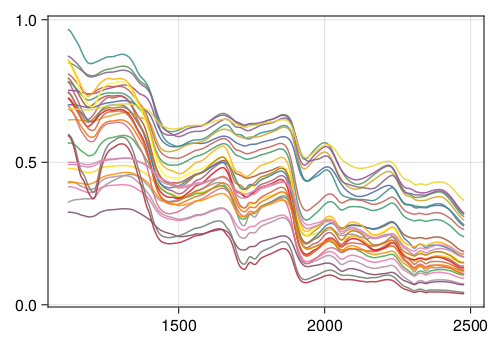

In [11]:
plotsp(X, wl_num; nsamp = 30).f

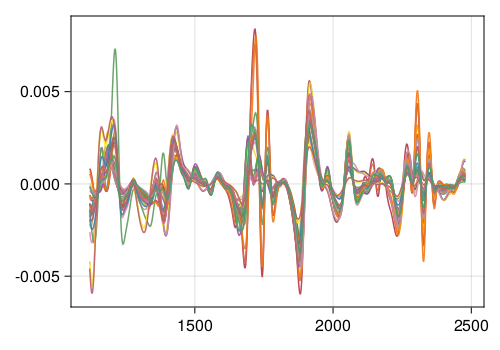

In [12]:
# Preprocesssing
f = 21 ; pol = 3 ; d = 2
Xp = savgol(snv(X); f = f, pol = pol, d = d) ;

plotsp(Xp, wl_num; nsamp = 30).f

In [13]:
# Splitting: Tot = Train + Test
# The PCA is fitted on Train, and Test will be
# the supplementary observations.
# Here the splitting is provided by the dataset
# (= variable 'typ'), but Tot could be splitted
# a posteriori using various methods (e.g. random sampling,
# systematic sampling, etc.)
s = Bool.(test)
# or: s = test .== 1
Xtrain = rmrow(Xp, s)
Ytrain = rmrow(Y, s)
Xtest = Xp[s, :]
Ytest = Y[s, :]
ntrain = nro(Xtrain)
ntest = nro(Xtest)
(ntot = ntot, ntrain, ntest)

(ntot = 4075, ntrain = 3701, ntest = 374)

In [14]:
# Model fitting on Train
nlv = 15
fm = pcasvd(Xtrain, nlv = nlv) ;

In [15]:
res = summary(fm, Xtrain).explvarx

Row,lv,var,pvar,cumpvar
,Int64,Float64,Float64,Float64
1,1,0.000105162,0.358111,0.358111
2,2,9.34465e-5,0.318215,0.676326
3,3,3.95892e-5,0.134814,0.811139
4,4,2.32407e-5,0.0791421,0.890282
5,5,1.10723e-5,0.0377047,0.927986
6,6,5.62409e-6,0.0191518,0.947138
7,7,3.63302e-6,0.0123716,0.95951
8,8,2.85538e-6,0.00972348,0.969233
9,9,2.73332e-6,0.00930783,0.978541


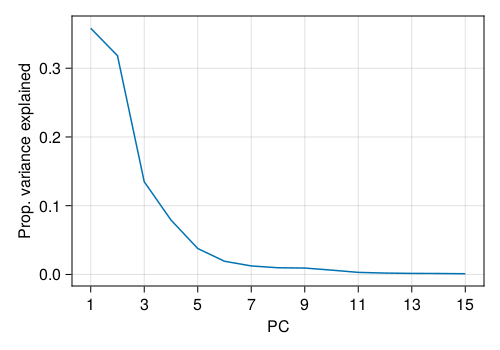

In [16]:
plotgrid(res.lv, res.pvar; step = 2,
    xlabel = "PC",
    ylabel = "Prop. variance explained").f

In [17]:
Ttrain = fm.T

3701×15 Matrix{Float64}:
 -0.00444931   0.0171604     0.00192674   …  -9.09844e-5    0.000153014
 -0.0119228   -0.00286706    0.00500189      -0.000282449  -0.000705488
 -0.00391203   0.0180218    -0.000975336      0.0001161     0.000142068
  0.0277303   -0.0122619    -0.00168272      -0.00104115    0.00070821
 -0.00495556  -0.00755239   -0.000652332     -0.000262822  -0.000890128
  0.027707     0.000331551   0.0112738    …  -0.000959858   0.00176454
 -0.00895449  -0.00173418    0.00544152      -0.000471481   0.000695263
 -0.0060758   -0.00380755    0.00447407       3.19392e-5    0.000566114
 -0.00733081   0.00312992   -0.0074763        0.000659916   0.000260964
 -0.00821355  -0.0116423     0.00520784       0.000337254  -0.000684901
  ⋮                                       ⋱                
 -0.00749651   0.0020409    -0.00628954       0.000480092   0.000160279
 -0.00662627  -0.000712063  -0.0102623       -0.000366592  -0.000146107
 -0.00727993  -0.00798247    7.41678e-5       0.00053

In [18]:
# Projection of Test in the Train score space
# Below function 'transform' has to be qualified
# since both packages Jchemo and DataFrames export
# a function 'transform'.
# This will be the same with common function names
# such as 'predict', 'coef', etc.
Ttest = Jchemo.transform(fm, Xtest)

374×15 Matrix{Float64}:
  0.0126087    0.0102876    0.00597325  …   6.27455e-5    0.000457277
 -0.00690901  -0.00507066   0.00472288      6.44318e-5    0.000224109
 -0.00284267   0.0236669   -7.55497e-5      0.000421497  -0.000256519
  0.00153578  -0.00895261  -0.00657187     -0.00042742    5.30836e-6
  0.00200626  -0.00333842   0.00451219     -0.00146572    4.54979e-6
  0.00147391  -0.00772003  -0.00604318  …  -0.000324654   5.49946e-5
  0.00571411   0.00536657   0.00211451     -0.000153273   0.000421519
  0.0141059    0.0100671    0.00371564     -0.000121858  -0.000146656
 -0.00866812  -0.00762948   0.00920612      0.00020418   -0.000845699
  0.0145121    0.0106849    0.00464452      0.000215844   0.000241881
  ⋮                                     ⋱                
 -0.00690415  -0.0018236   -0.00987728  …  -0.000413862  -0.00077323
  0.00125518  -0.00554321  -0.00521274     -0.000217435   0.000301735
 -0.00713479   0.00138266  -0.00598984      0.000393652   3.41471e-5
 -0.00700286 

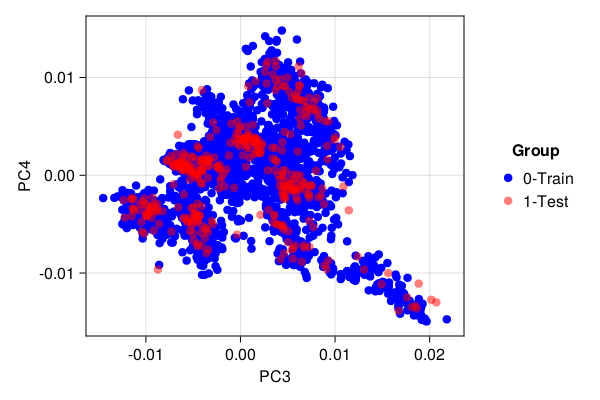

In [19]:
T = vcat(Ttrain, Ttest)
group = vcat(repeat(["0-Train";], ntrain),
    repeat(["1-Test";], ntest))
colm = [:blue, (:red, .5)]
i = 3
plotxy(T[:, i:(i + 1)], group; color = colm,
    xlabel = string("PC", i),
    ylabel = string("PC", i + 1)).f

In [20]:
# SD and OD distances
res = occsdod(fm, Xtrain) ;
pnames(res)

(:d, :fm_sd, :fm_od)

In [21]:
dtrain = res.d

Row,d_sd,dstand_sd,pval_sd,gh_sd,d_od,dstand_od,pval_od,dstand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,3.085,0.499062,0.646042,0.634483,0.0013676,0.53196,0.330181,0.515248
2,4.27664,0.691833,0.228046,1.21931,0.00109864,0.427343,0.534991,0.543737
3,2.80947,0.454489,0.778708,0.52621,0.00171652,0.667682,0.165091,0.550867
4,5.61257,0.907947,0.0734937,2.10007,0.00149918,0.583139,0.251824,0.72764
5,4.52643,0.732241,0.17806,1.3659,0.00239797,0.932746,0.0394488,0.826435
6,8.57778,1.38763,0.00567414,4.90522,0.00269219,1.04719,0.020535,1.20545
7,4.3133,0.697763,0.21886,1.2403,0.00237207,0.922672,0.0418806,0.802376
8,2.99909,0.485163,0.691435,0.599636,0.001398,0.543787,0.309916,0.513639
9,2.9305,0.474067,0.723858,0.572521,0.000706471,0.274799,0.881654,0.360933


In [22]:
# Values for Test
dtest = Jchemo.predict(res, Xtest).d

Row,d_sd,dstand_sd,pval_sd,gh_sd,d_od,dstand_od,pval_od,dstand
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4.0264,0.651352,0.296677,1.08079,0.0011638,0.452687,0.483383,0.543009
2,3.33244,0.53909,0.526614,0.740346,0.00140561,0.546746,0.305593,0.542905
3,3.97524,0.643076,0.307755,1.0535,0.0013676,0.531958,0.330451,0.584884
4,3.61575,0.584921,0.414483,0.871577,0.00149364,0.580988,0.255877,0.582951
5,5.69029,0.920519,0.0702513,2.15863,0.00234244,0.911147,0.0440422,0.915821
6,3.46146,0.559962,0.472845,0.798783,0.00101025,0.392961,0.607403,0.469087
7,3.6744,0.594409,0.395299,0.900082,0.00256967,0.999532,0.0245879,0.770799
8,2.60613,0.421594,0.857336,0.452795,0.00139732,0.543519,0.310186,0.478691
9,3.92332,0.634677,0.318833,1.02617,0.00202409,0.787318,0.0902459,0.706889


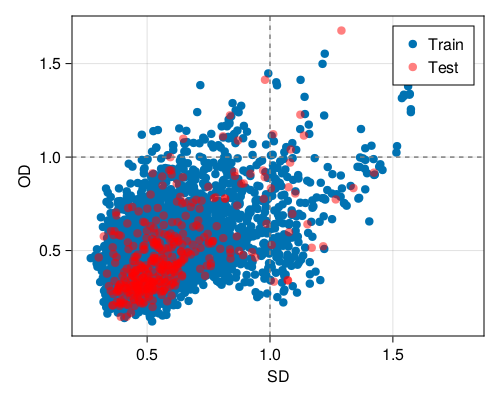

In [23]:
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "SD", ylabel = "OD")
scatter!(ax, dtrain.dstand_sd, dtrain.dstand_od, label = "Train")
scatter!(ax, dtest.dstand_sd, dtest.dstand_od,
    color = (:red, .5), label = "Test")
hlines!(ax, 1; color = :grey, linestyle = "-")
vlines!(ax, 1; color = :grey, linestyle = "-")
axislegend(position = :rt)
f

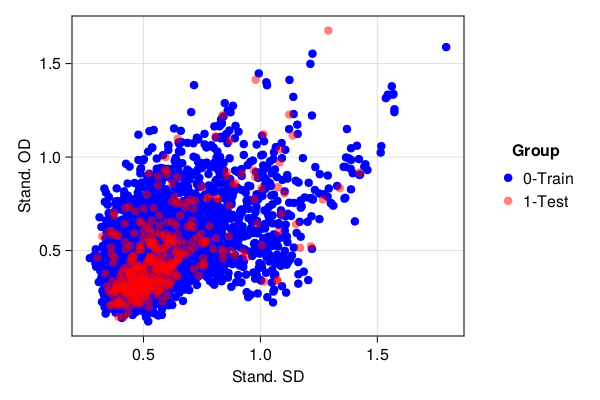

In [24]:
# Same with plotxy:
d = vcat(dtrain, dtest)
group = vcat(repeat(["0-Train";], ntrain),
    repeat(["1-Test";], ntest))
colm = [:blue, (:red, .5)]
plotxy(d.dstand_sd, d.dstand_od, group; color = colm,
    xlabel = "Stand. SD", ylabel = "Stand. OD").f

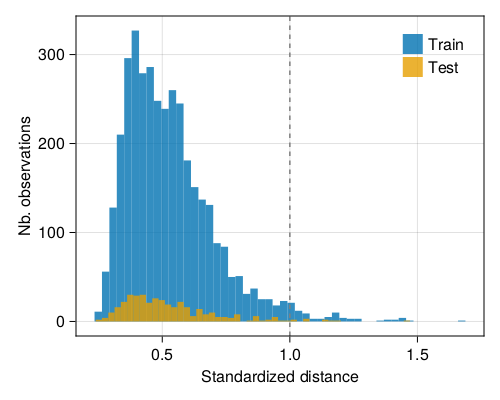

In [25]:
# Composite distance SD-OD
f = Figure(resolution = (500, 400))
ax = Axis(f[1, 1], xlabel = "Standardized distance",
    ylabel = "Nb. observations")
hist!(ax, dtrain.dstand; bins = 50, label = "Train")
hist!(ax, dtest.dstand; bins = 50, label = "Test")
vlines!(ax, 1; color = :grey, linestyle = "-")
axislegend(position = :rt, framevisible = false)
f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*